In [1]:
!git clone https://github.com/TNTD-dev/cs221-sentiment-analysis-for-banking.git

Cloning into 'cs221-sentiment-analysis-for-banking'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 29 (delta 6), reused 27 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 703.39 KiB | 26.05 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [3]:
%cd cs221-sentiment-analysis-for-banking

/content/cs221-sentiment-analysis-for-banking


In [4]:
%pip install requirements.txt

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt


In [5]:
import torch

print("🔍 Checking GPU availability...")
if torch.cuda.is_available():
    print(f"✅ GPU is available: {torch.cuda.get_device_name(0)}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"🔢 Number of GPUs: {torch.cuda.device_count()}")
else:
    print("❌ No GPU found. Make sure you've selected GPU runtime:")
    print("   Runtime → Change runtime type → Hardware accelerator → GPU (T4)")


🔍 Checking GPU availability...
✅ GPU is available: Tesla T4
💾 GPU Memory: 15.83 GB
🔢 Number of GPUs: 1


In [6]:
import os

print("🔍 Checking data files...")
data_files = [
    'data/processed/train_processed.csv',
    'data/processed/val_processed.csv',
    'data/processed/test_processed.csv'
]

all_exist = True
for file in data_files:
    if os.path.exists(file):
        print(f"✅ {file} found")
    else:
        print(f"❌ {file} NOT FOUND")
        all_exist = False

if all_exist:
    print("\n✅ All data files are ready!")
else:
    print("\n⚠️ Some data files are missing. Make sure you've pushed them to GitHub.")


🔍 Checking data files...
✅ data/processed/train_processed.csv found
✅ data/processed/val_processed.csv found
✅ data/processed/test_processed.csv found

✅ All data files are ready!


In [7]:
!python train.py --model all --epochs 10 --batch-size 16

2026-01-10 06:52:12.511216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768027932.530010    1018 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768027932.535749    1018 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768027932.550632    1018 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768027932.550655    1018 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768027932.550659    1018 computation_placer.cc:177] computation placer alr

📊 Model Comparison Results:



,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted),F1 (Macro),Precision (Macro),Recall (Macro),Training Time (s)
0,Logistic Regression,0.911638,0.903880,0.911638,0.905840,0.610841,0.617881,0.606721,1.560862
1,Linear SVM,0.922414,0.907004,0.922414,0.913978,0.616952,0.617114,0.617775,0.068294
2,Naive Bayes,0.922414,0.910137,0.922414,0.913440,0.616147,0.624113,0.612429,0.065753
3,PhoBERT,0.946121,0.929772,0.946121,0.937872,0.634035,0.628918,0.639242,304.195897
4,XLM-RoBERTa,0.941810,0.925546,0.941810,0.933568,0.631702,0.627453,0.636067,1500.436224



📈 Visualization:


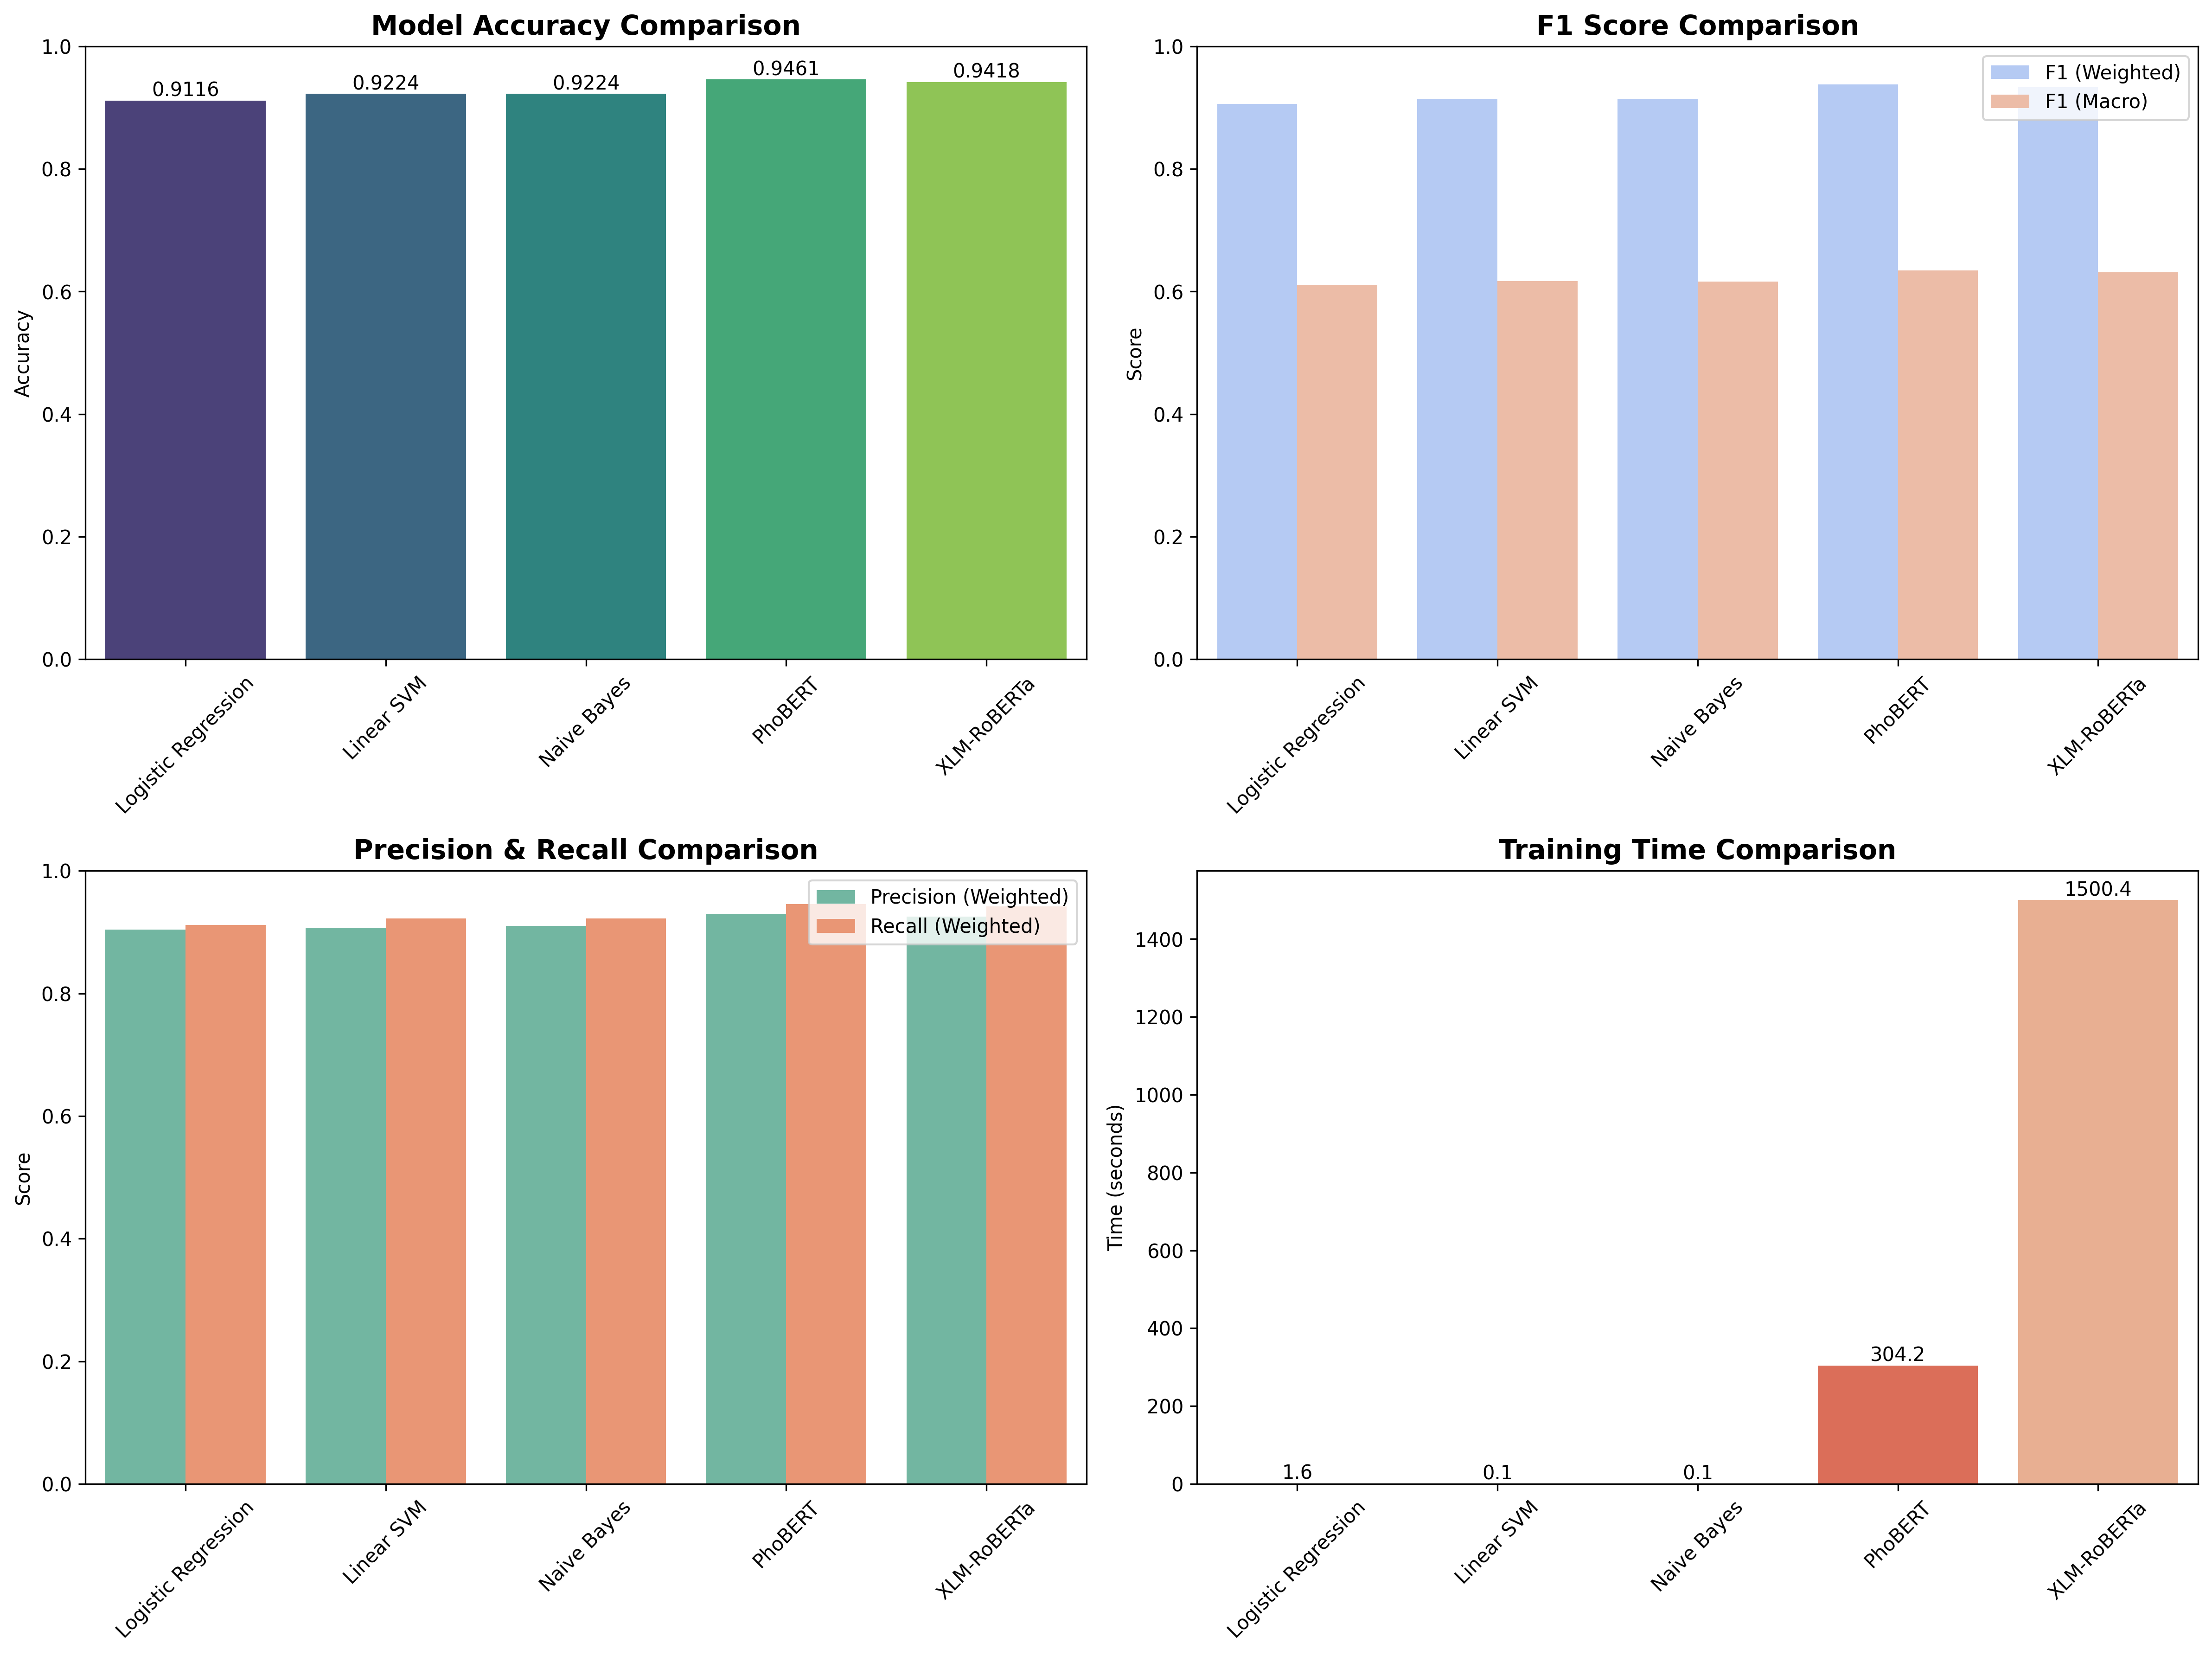

In [8]:
import pandas as pd
from IPython.display import Image, display

# Load comparison results
print("📊 Model Comparison Results:\n")
df = pd.read_csv('results/comparison.csv')
display(df)

# Display comparison visualization
print("\n📈 Visualization:")
display(Image('results/model_comparison.png'))


In [10]:
from google.colab import drive
import shutil
import os
from datetime import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Create timestamped folder
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
drive_dir = f'/content/drive/MyDrive/NLP_Project_Results/{timestamp}'
os.makedirs(drive_dir, exist_ok=True)

print(f"📁 Saving to: {drive_dir}")

# Copy models
if os.path.exists('models'):
    print("📦 Copying models...")
    shutil.copytree('models', f'{drive_dir}/models', dirs_exist_ok=True)
    print("✅ Models saved")

# Copy results
if os.path.exists('results'):
    print("📊 Copying results...")
    shutil.copytree('results', f'{drive_dir}/results', dirs_exist_ok=True)
    print("✅ Results saved")

print(f"\n✅ Done! Files saved to Google Drive:")
print(f"   {drive_dir}")
print(f"\n💡 Tip: Install Google Drive Desktop to auto-sync to your computer")


Mounted at /content/drive
📁 Saving to: /content/drive/MyDrive/NLP_Project_Results/20260110_073812
📦 Copying models...
✅ Models saved
📊 Copying results...
✅ Results saved

✅ Done! Files saved to Google Drive:
   /content/drive/MyDrive/NLP_Project_Results/20260110_073812

💡 Tip: Install Google Drive Desktop to auto-sync to your computer
